# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
df = pd.read_csv("data/cars.csv")

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [4]:
# 1. Print the number of duplicate rows we have in our dataframe.
print("Number of duplicate rows: ", df.duplicated().sum())
df.duplicated()

Number of duplicate rows:  720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [5]:
# Modify our df to have all duplicate rows removed. 
print(df.shape, 'before dropping dupes')

df = df.drop_duplicates()

print(df.shape, 'rows after dropping dupes')



(11914, 15) before dropping dupes
(11194, 15) rows after dropping dupes


In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
null_counts =df.isnull().sum()
print(null_counts)

max_null_column = null_counts.idxmax()
max_null_count = null_counts.max()
print(f"The column with the most null values is '{max_null_column}' with {max_null_count} null values.")


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64
The column with the most null values is 'Engine HP' with 69 null values.


In [8]:
# * Print how long our dataframe is.
df.shape

(11194, 15)

In [9]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.isnull().sum())
df.shape

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


(11092, 15)

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

In [23]:
df.Make.value_counts()

Chevrolet        1075
Ford              811
Toyota            713
Volkswagen        564
Nissan            541
Dodge             528
GMC               482
Honda             431
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            339
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               224
Mitsubishi        205
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           152
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            68
Scion              60
FIAT               59
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugatti   

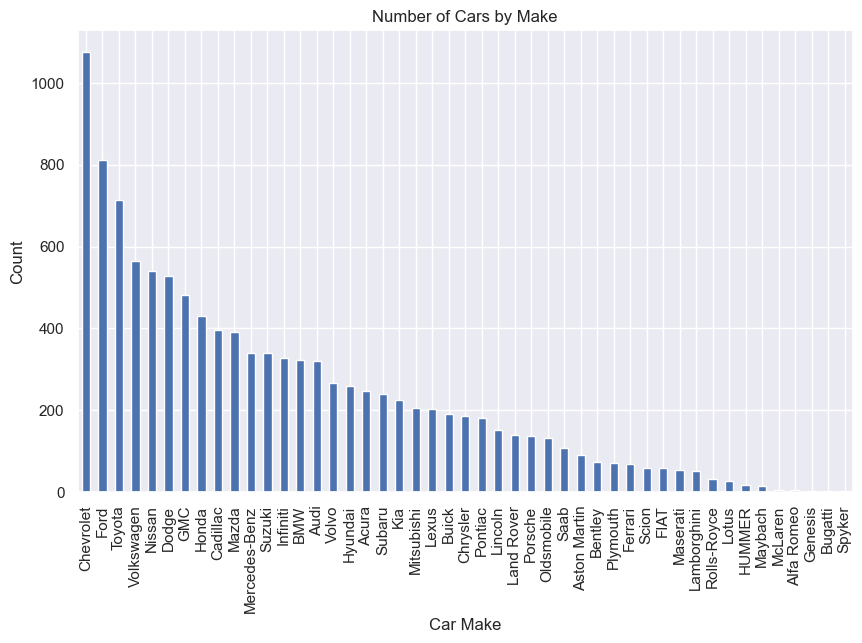

In [47]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
print("s")

# Way 1:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
brand_counts.plot(kind="bar", rot=90)
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.title("Number of Cars by Make")
plt.show()

Text(0, 0.5, 'Count')

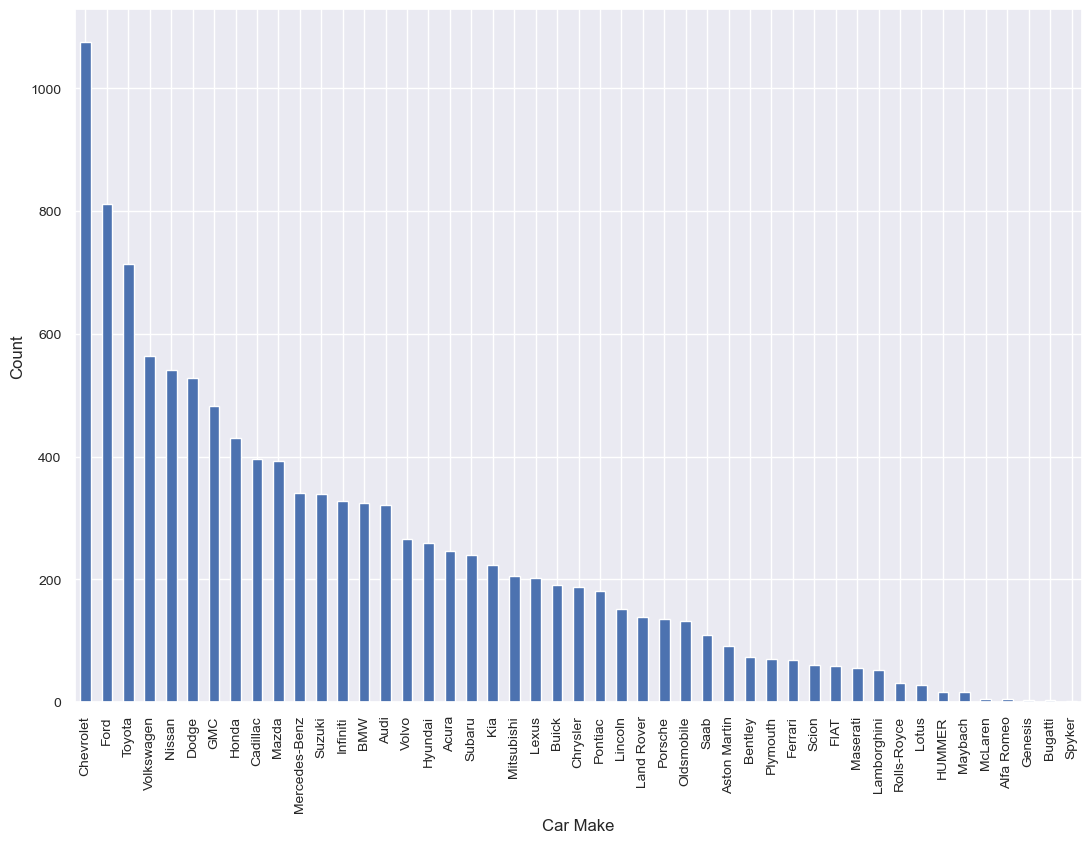

In [58]:
# Way 2:
df.Make.value_counts().plot(kind="bar", rot=90, fontsize =10, figsize=(13,9))
plt.xlabel("Car Make")
plt.ylabel("Count")

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

Text(0, 0.5, 'Count')

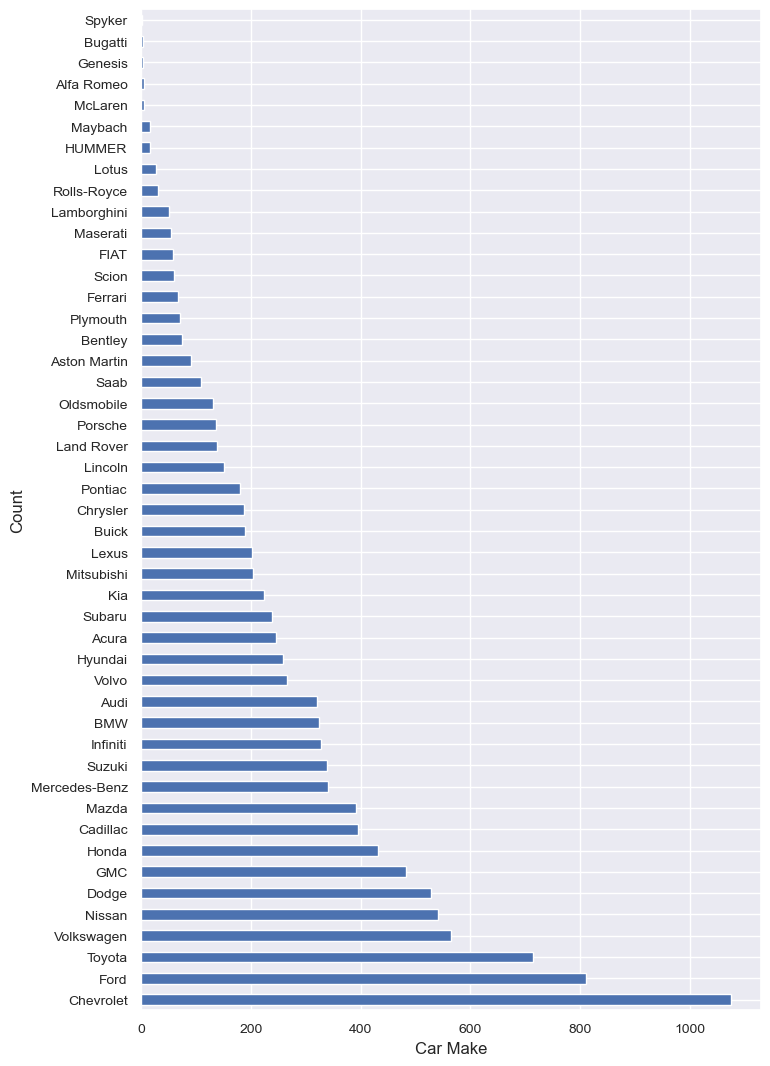

In [64]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
brand_counts = df.Make.value_counts().sort_values(ascending = False)
brand_counts.plot(kind="barh", fontsize =10, figsize=(8,13))
plt.xlabel("Car Make")
plt.ylabel("Count")

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


In [65]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


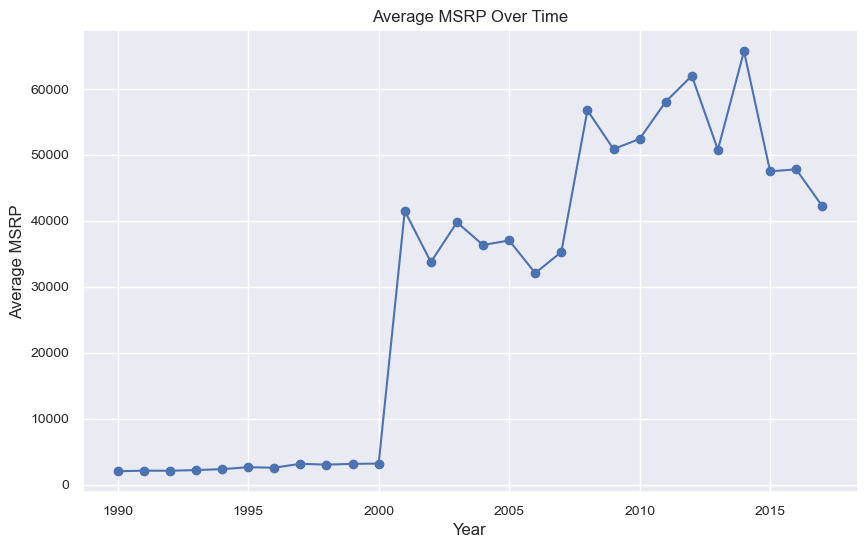

In [69]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
average_msrp_by_year = df.groupby("Year")["MSRP"].mean()

# Create a line chart
plt.figure(figsize=(10, 6))  # Set the figure size
average_msrp_by_year.plot(kind="line", marker="o", fontsize=10)
plt.xlabel("Year")
plt.ylabel("Average MSRP")
plt.title("Average MSRP Over Time")
plt.grid(True)  # Add gridlines (optional)
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [70]:
# Make a column where is 10 when year is less than 2000, else 1.
condition = df['Year'] < 2000
df["adjusted_price"] = np.where(condition, 10, 1)

# Multiply the MSRP by the price adjuster.
df["adjusted_price"] = df["MSRP"]* df["adjusted_price"] 
df.head(100)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Nissan,240SX,1998,regular unleaded,155.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,25,20,2009,4107,41070
104,Volvo,240,1991,regular unleaded,114.0,4.0,MANUAL,rear wheel drive,4.0,Midsize,Wagon,26,19,870,2000,20000
105,Volvo,240,1991,regular unleaded,114.0,4.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Wagon,23,18,870,2000,20000
106,Volvo,240,1991,regular unleaded,114.0,4.0,MANUAL,rear wheel drive,4.0,Midsize,Sedan,26,19,870,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

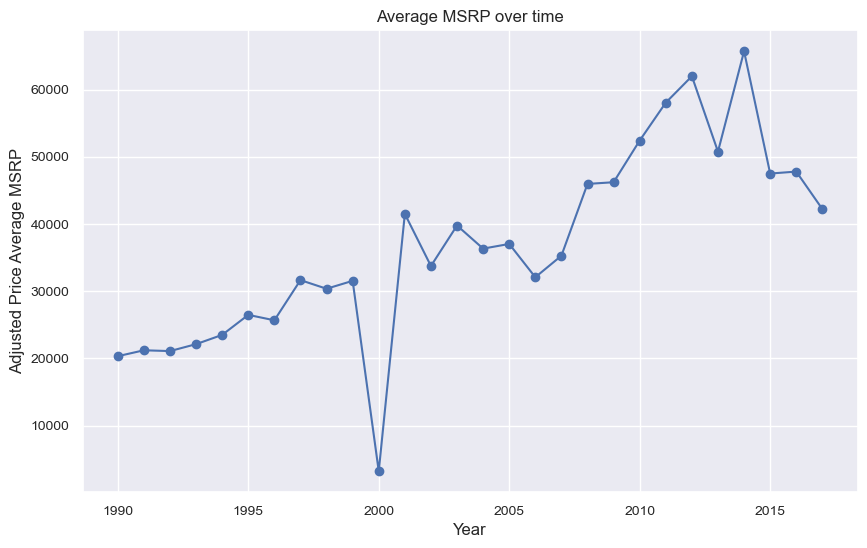

In [84]:
# Plot new prices
average_msrp_by_year = df.groupby("Year")["adjusted_price"].mean()

# Create a line chart
plt.figure(figsize=(10, 6))  # Set the figure size
average_msrp_by_year.plot(kind="line", marker="o", fontsize=10)
plt.xlabel("Year")
plt.ylabel("Adjusted Price Average MSRP")
plt.title("Average MSRP over time")
plt.grid(True)  # Add gridlines (optional)
plt.show()


# Plot the relationship between Engine HP and highway MPG

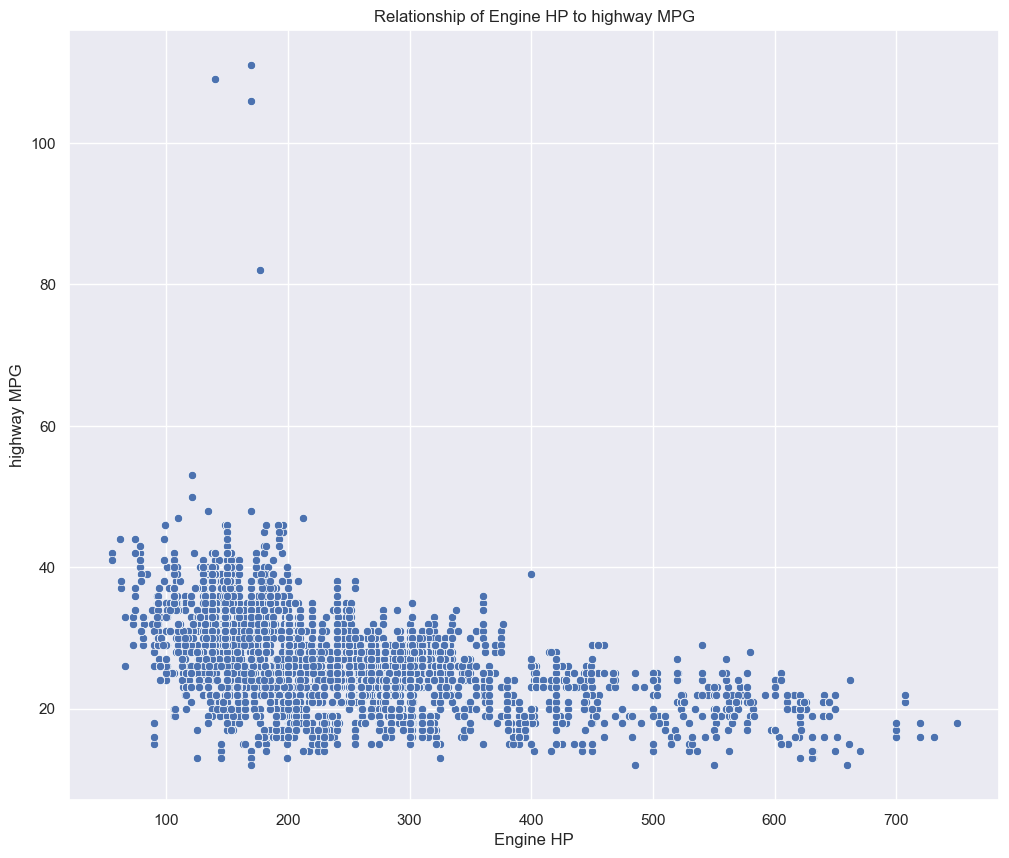

In [85]:
# Plot the relationship between Engine HP and highway MPG
plt.figure(figsize=(12, 10))

relationship_Engine_HP_highway_MPG = sns.scatterplot(
    data=df, 
    x='Engine HP', 
    y='highway MPG');

relationship_Engine_HP_highway_MPG.set_title("Relationship of Engine HP to highway MPG");

#showing figure
plt.show()

In [86]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
condition1 = df['highway MPG']<150
condition2 = df['Engine HP']<800

df = df[condition1 & condition2]

# Replot the relationship between Engine HP and highway MPG


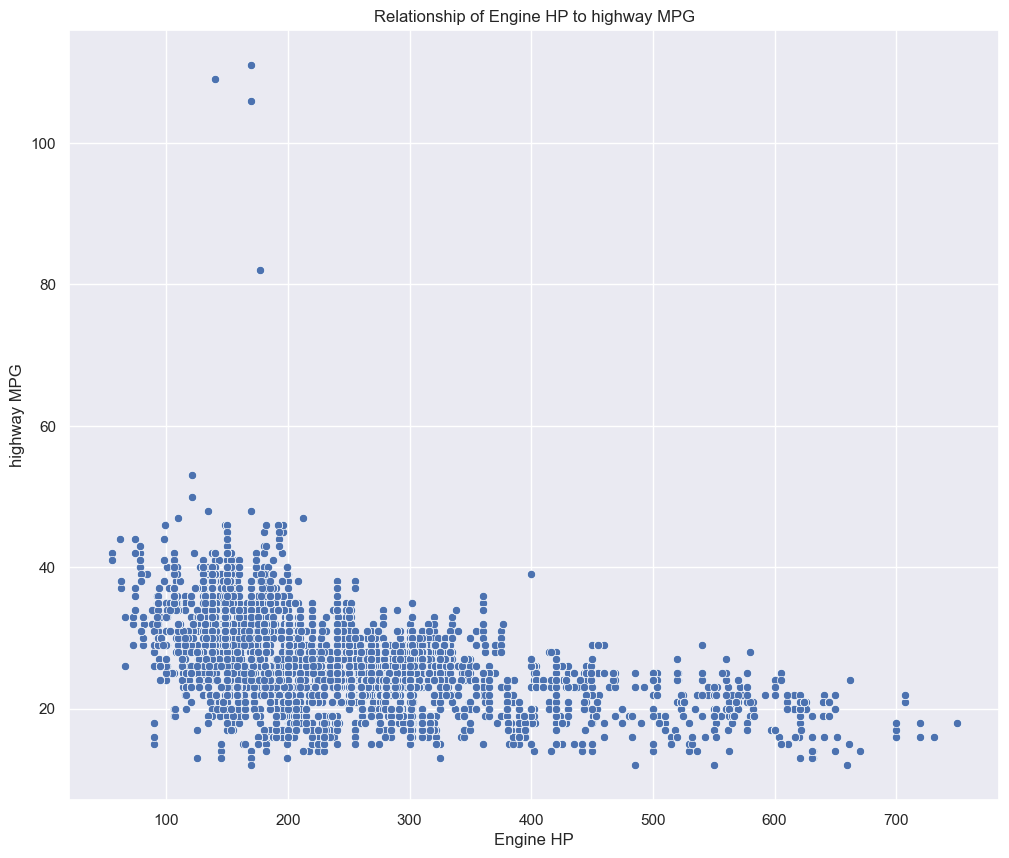

In [87]:
# Re-Plot the relationship between Engine HP and highway MPG
plt.figure(figsize=(12, 10))

relationship_Engine_HP_highway_MPG = sns.scatterplot(
    data=df, 
    x='Engine HP', 
    y='highway MPG');

relationship_Engine_HP_highway_MPG.set_title("Relationship of Engine HP to highway MPG");

#showing figure
plt.show()

# Make a scatter plot of Engine HP vs highway MPG

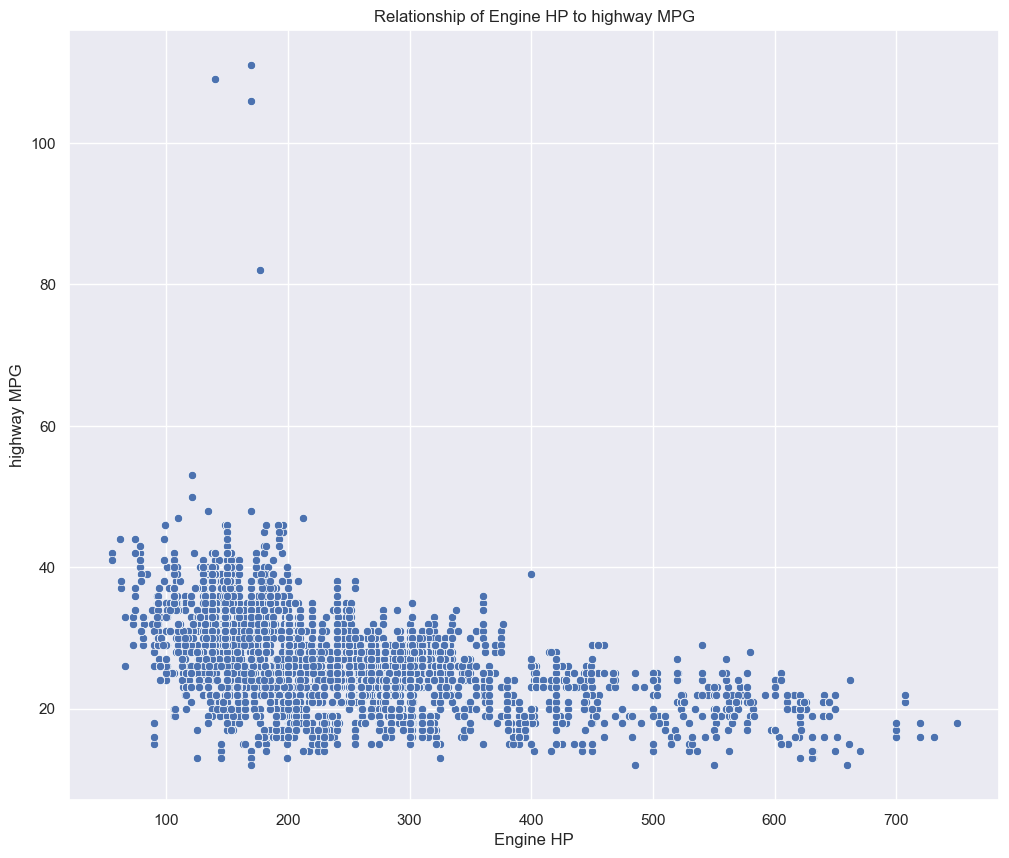

In [88]:
# Make a scatter plot of Engine HP vs highway MPG
# Setting the figure size
plt.figure(figsize=(12, 10))

relationship_Engine_HP_highway_MPG = sns.scatterplot(
    data=df, 
    x='Engine HP', 
    y='highway MPG');

relationship_Engine_HP_highway_MPG.set_title("Relationship of Engine HP to highway MPG");

#showing figure
plt.show()

# What does this plot tell you about how Engine HP affects highway MPG?

In [89]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('If the horsepower increases , so we know the highway MPG decreases.')


If the horsepower increases , so we know the highway MPG decreases.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

<Figure size 1200x1000 with 0 Axes>

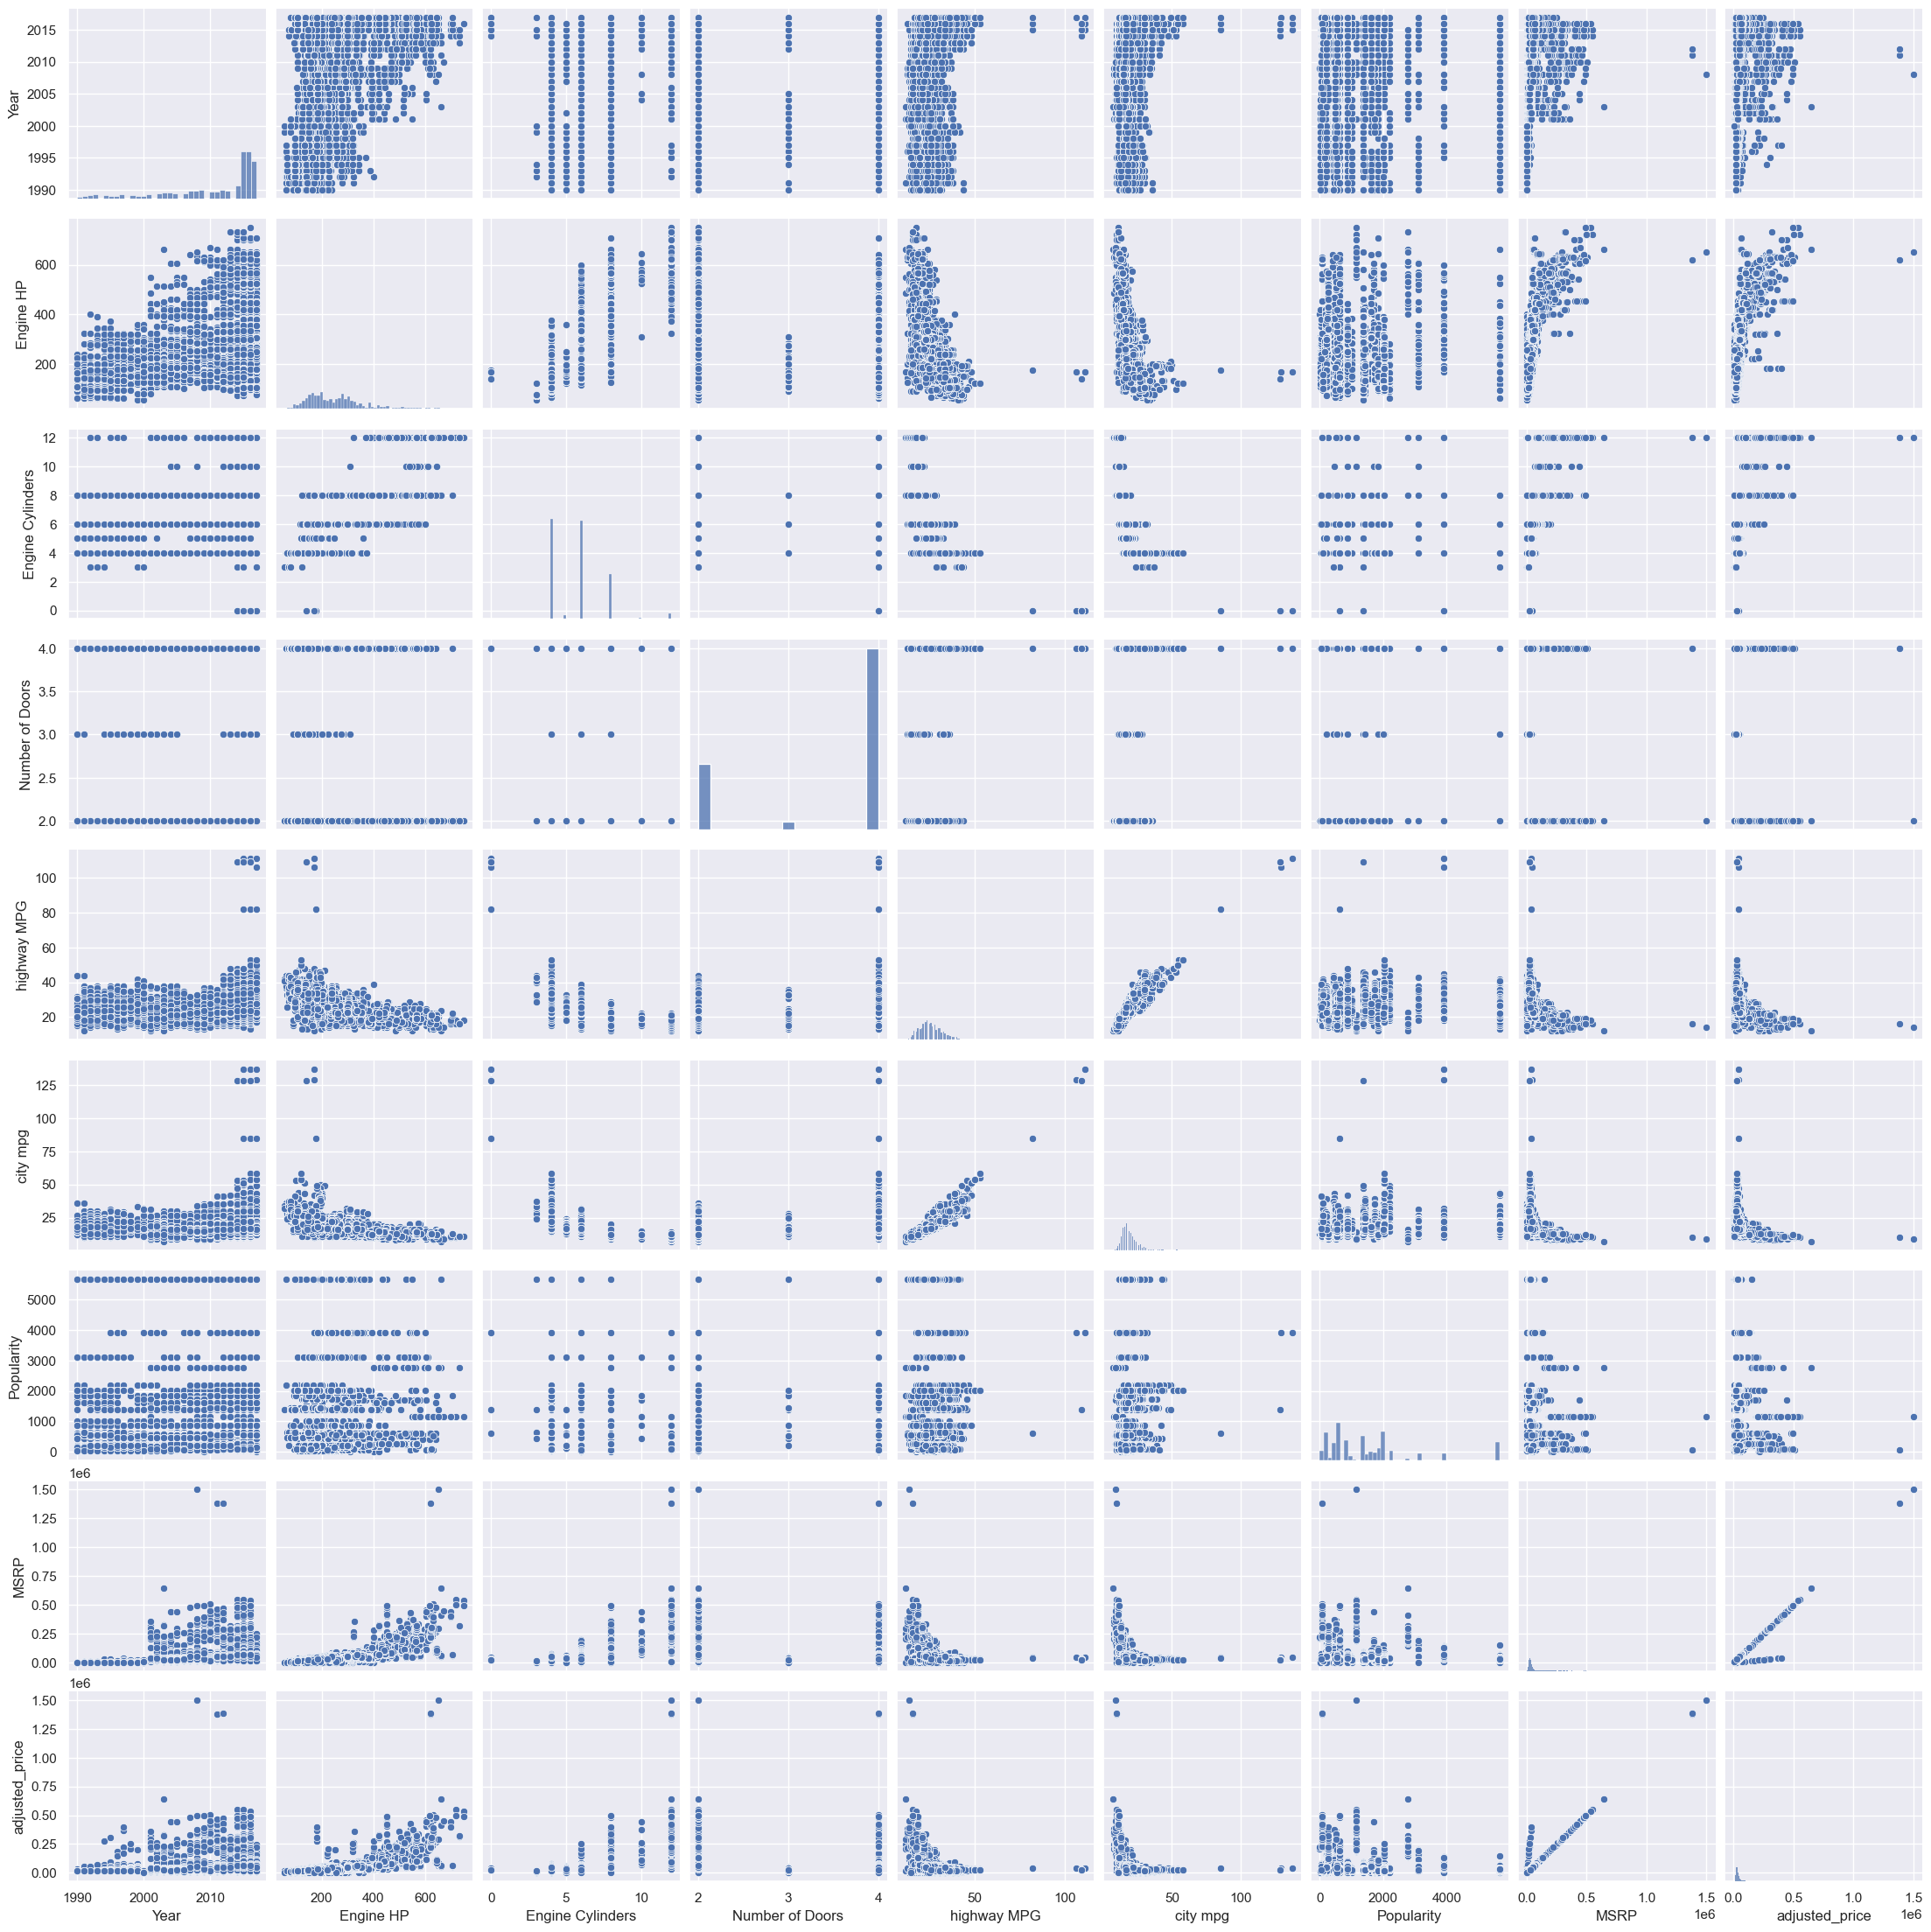

In [90]:
# Using a pairplot, display all of the linear relationship.

# setting plot size
plt.figure(figsize=(12, 10))

sns.pairplot(df)

# Show the pairplot
plt.show()

In [91]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print("city mpg and highway MPG")

city mpg and highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

/var/folders/6s/476b97px21s298b2n9y6fm7r0000gn/T/ipykernel_17232/4094967467.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


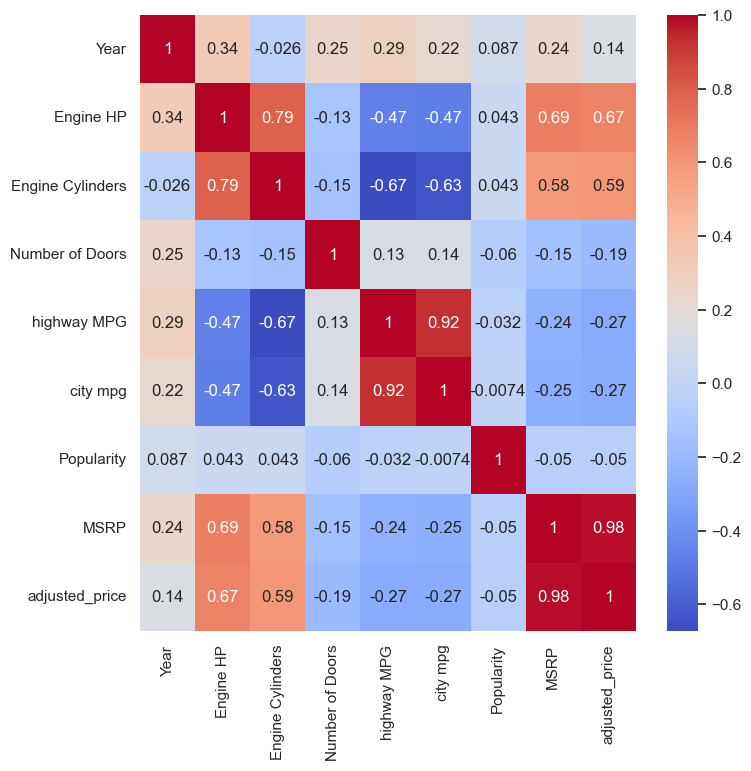

In [92]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# setting plot size
plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm');

# Show the heatmap
plt.show()

In [93]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Now it has the strongest relationship with the Engine Cylinders!')

Now it has the strongest relationship with the Engine Cylinders!


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


